In [51]:
import numpy as np
import scipy as sc
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from glob import glob

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [52]:
p = plt.rcParams
p["scatter.marker"] = '.'
p["lines.markersize"] = 1


In [53]:
headers = []
datas = []
for run in sorted(glob('../data/position_radial/*')):
    header = np.loadtxt(run, delimiter='\t', skiprows=1, max_rows=1, unpack=True)
    p, d, G, A, f, I_chauffage, V_polarisation, *V_grill = header
    headers.append(header)

    data = np.loadtxt(run, delimiter='\t', skiprows=2, unpack=True)
    V_in, V_out, *_ = data
    I_out = V_out / (10 * G)

    values, counts = np.unique_counts(V_in)
    V_in_combined = np.zeros_like(values)
    I_out_combined = np.zeros_like(values)
    I_out_std_combined = np.zeros_like(values)
    for i, (value, count) in enumerate(zip(values, counts)):
        idx = np.nonzero(V_in == value)
        V_in_combined[i] = value
        I_out_combined[i] = np.mean(I_out[idx])
        I_out_std_combined[i] = np.std(I_out[idx])

    datas.append((V_in_combined, I_out_combined, I_out_std_combined))

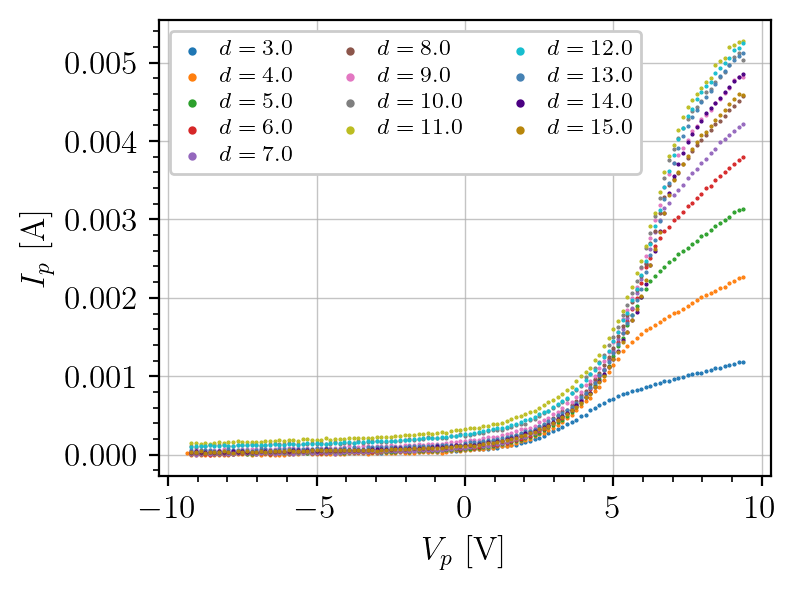

In [54]:
fig, ax = plt.subplots(1,1, dpi=200)
colors = list(plt.cm.tab10(np.arange(10))) + ["steelblue", "indigo", "darkgoldenrod", "seagreen", "orangered"]
ax.set_prop_cycle('color', colors)
plt.xlabel("$V_p$ [V]")
plt.ylabel("$I_p$ [A]")
for header, data in zip(headers, datas):
    p, d, G, A, f, I_chauffage, V_polarisation, *V_grill = header
    V_in, I_out, I_out_std = data

    plt.scatter(V_in, I_out, label=f"$d = {d}$")
    idx = I_out < 0
    # plt.scatter(V_in[idx], I_out[idx])
    plt.legend(ncols=3, fontsize=8, markerscale=4)

## Find V_{sp}, ln(I_{es})

In [55]:
def set_all_between(arr):
    idx = np.nonzero(arr)[0]
    idx_start, idx_stop = idx[0], idx[-1]
    arr[idx_start:idx_stop+1] = True
    return arr

4.58+/-0.10 0.000775+/-0.000013
T_e_run = (1.91±0.03)×10⁴, T_run = (1.65±0.03)×10⁰, n_e_run = (7.2±0.1)×10¹⁵


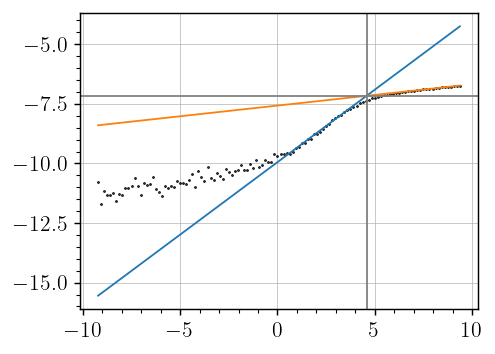

5.22+/-0.09 0.00151+/-0.00004
T_e_run = (1.76±0.02)×10⁴, T_run = (1.52±0.02)×10⁰, n_e_run = (1.45±0.04)×10¹⁶


/var/folders/s6/cl_qc4357kx9vckbb8vx6c740000gp/T/ipykernel_66718/1652386227.py:8: RuntimeWarning: invalid value encountered in log
  dydx = np.gradient(np.log(I_out), V_in)
/var/folders/s6/cl_qc4357kx9vckbb8vx6c740000gp/T/ipykernel_66718/1652386227.py:25: RuntimeWarning: invalid value encountered in log
  plt.scatter(V_in, np.log(I_out), c='k')


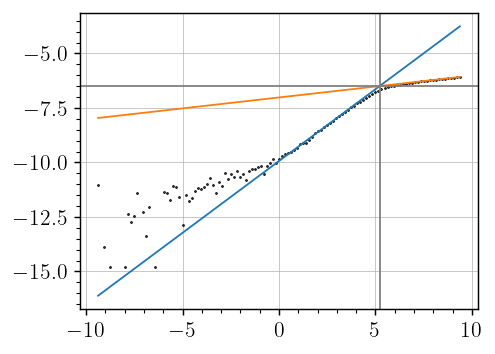

6.18+/-0.10 0.00232+/-0.00006
T_e_run = (2.02±0.02)×10⁴, T_run = (1.74±0.02)×10⁰, n_e_run = (2.08±0.05)×10¹⁶


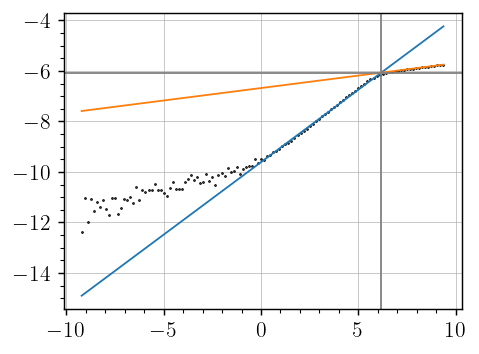

6.41+/-0.13 0.00282+/-0.00008
T_e_run = (2.03±0.03)×10⁴, T_run = (1.75±0.02)×10⁰, n_e_run = (2.53±0.06)×10¹⁶


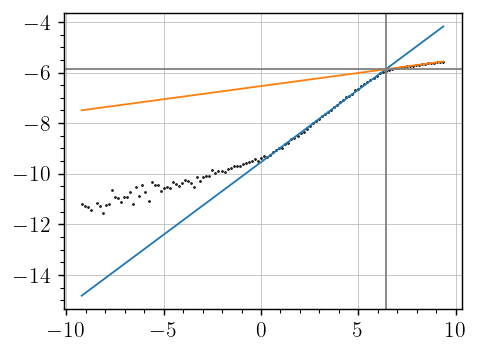

6.97+/-0.25 0.00333+/-0.00015
T_e_run = (2.18±0.06)×10⁴, T_run = (1.88±0.05)×10⁰, n_e_run = (2.9±0.1)×10¹⁶


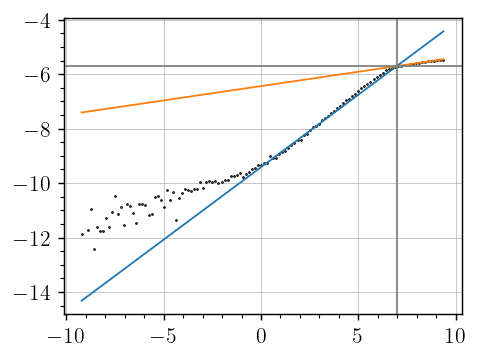

7.58+/-0.27 0.00380+/-0.00022
T_e_run = (2.50±0.06)×10⁴, T_run = (2.15±0.05)×10⁰, n_e_run = (3.1±0.2)×10¹⁶


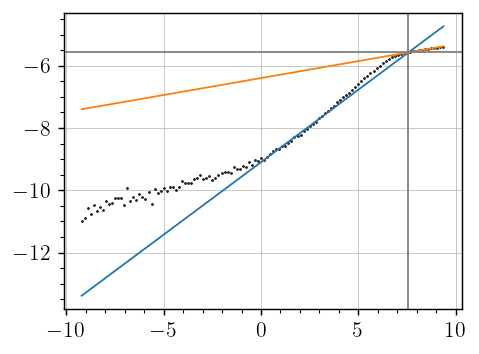

7.8+/-0.6 0.0041+/-0.0004
T_e_run = (2.6±0.1)×10⁴, T_run = (2.3±0.1)×10⁰, n_e_run = (3.2±0.2)×10¹⁶


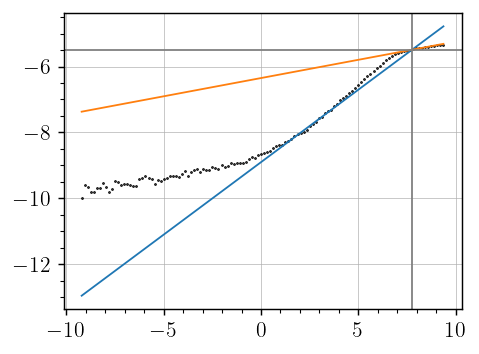

10.5+/-0.7 0.0060+/-0.0006
T_e_run = (3.7±0.1)×10⁴, T_run = (3.2±0.1)×10⁰, n_e_run = (4.0±0.4)×10¹⁶


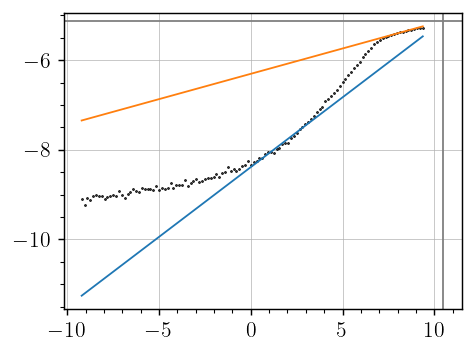

10.3+/-0.6 0.0060+/-0.0009
T_e_run = (3.91±0.08)×10⁴, T_run = (3.37±0.07)×10⁰, n_e_run = (3.9±0.6)×10¹⁶


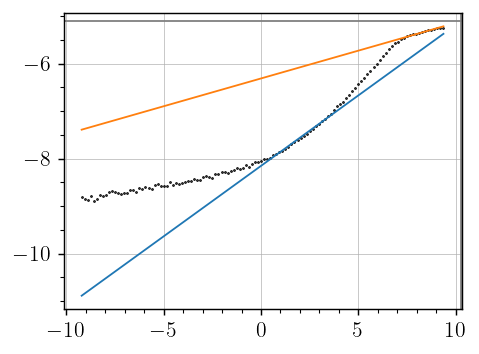

10.9+/-0.7 0.0065+/-0.0012
T_e_run = (3.84±0.09)×10⁴, T_run = (3.31±0.08)×10⁰, n_e_run = (4.2±0.8)×10¹⁶


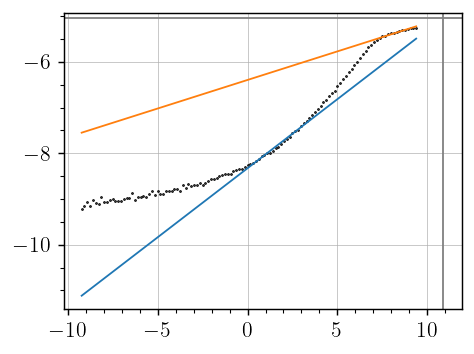

8.4+/-0.4 0.0047+/-0.0006
T_e_run = (2.71±0.06)×10⁴, T_run = (2.33±0.05)×10⁰, n_e_run = (3.6±0.4)×10¹⁶


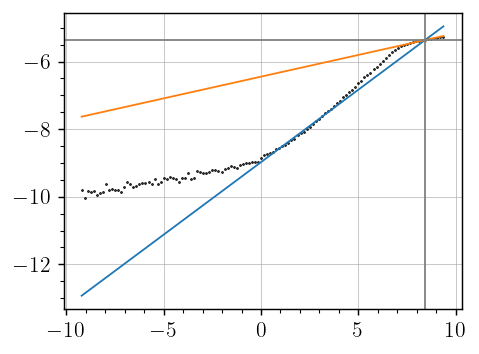

7.60+/-0.20 0.00406+/-0.00028
T_e_run = (2.36±0.03)×10⁴, T_run = (2.03±0.03)×10⁰, n_e_run = (3.4±0.2)×10¹⁶


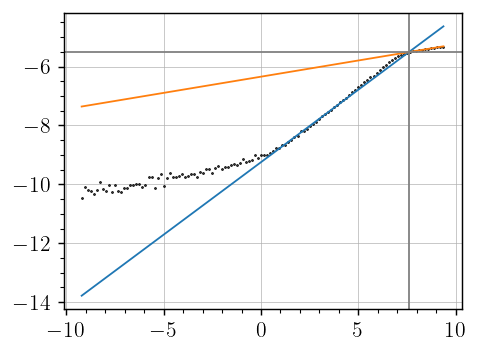

7.89+/-0.24 0.00400+/-0.00025
T_e_run = (2.47±0.05)×10⁴, T_run = (2.13±0.04)×10⁰, n_e_run = (3.2±0.2)×10¹⁶


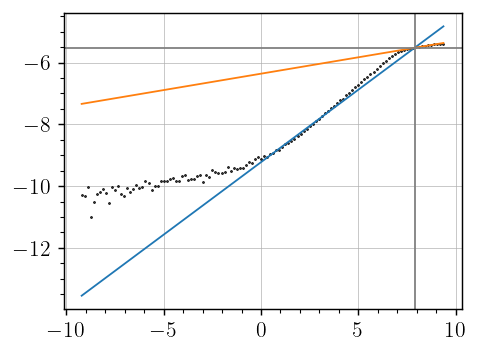

In [56]:
T_e = unp.uarray(np.zeros(len(datas)), np.zeros(len(datas)))
T = unp.uarray(np.zeros(len(datas)), np.zeros(len(datas)))
n_e = unp.uarray(np.zeros(len(datas)), np.zeros(len(datas)))
for i, (header, data) in enumerate(zip(headers, datas)):
    p, d, G, A, f, I_chauffage, V_polarisation, *V_grill = header
    V_in, I_out, I_out_std = data

    dydx = np.gradient(np.log(I_out), V_in)
    threshold = 7e-2
    idx = np.abs(np.diff(dydx, prepend=0)) < threshold
    idx = np.logical_and(idx, V_in > 0)
    idx_B = set_all_between(np.logical_and(idx, V_in < 3.5))
    idx_C = set_all_between(np.logical_and(idx, V_in > 7))
    # idx_B = np.logical_and(0 < V_in, V_in < 3)
    # idx_C = V_in > 6

    coefsB, covB = np.polyfit(V_in[idx_B], np.log(I_out[idx_B]), 1, cov=True)
    coefs_errB = unp.uarray(coefsB, np.sqrt(np.diag(covB)))
    fitfuncB = np.poly1d(coefsB)
    coefsC, covC = np.polyfit(V_in[idx_C], np.log(I_out[idx_C]), 1, cov=True)
    coefs_errC = unp.uarray(coefsC, np.sqrt(np.diag(covC)))
    fitfuncC = np.poly1d(coefsC)

    x = np.linspace(V_in[0], V_in[-1])
    plt.scatter(V_in, np.log(I_out), c='k')
    plt.plot(x, fitfuncB(x))
    plt.plot(x, fitfuncC(x))

    V_sp = -(coefs_errC[1] - coefs_errB[1]) / (coefs_errC[0] - coefs_errB[0])
    I_sp = umath.exp(coefs_errB[0] * V_sp + coefs_errB[1])
    print(V_sp, I_sp)
    plt.axvline(V_sp.n)
    plt.axhline(umath.log(I_sp).n)

    T_e_run = 1/coefs_errB[0] * ELEMENTARY_CHARGE / BOLTZMANN_CONSTANT_JOULE
    T_run = T_e_run * BOLTZMANN_CONSTANT_ELECTRONVOLT
    # TODO: verifier unitées
    n_e_run = 4 / (ELEMENTARY_CHARGE * SURFACE_PROBE) * unp.sqrt(2 * np.pi * ELECTRON_MASS / (BOLTZMANN_CONSTANT_JOULE * T_e_run)) * I_sp
    print(f"{T_e_run = :.1ueP}, {T_run = :.1ueP}, {n_e_run = :.1ueP}")
    T_e[i] = T_e_run
    T[i] = T_run
    n_e[i] = n_e_run
    plt.show()
    # plt.gcf().delaxes(plt.gca())

In [57]:
distances = list(map(lambda header: header[1], headers))

Text(0, 0.5, '$T_e$ [K]')

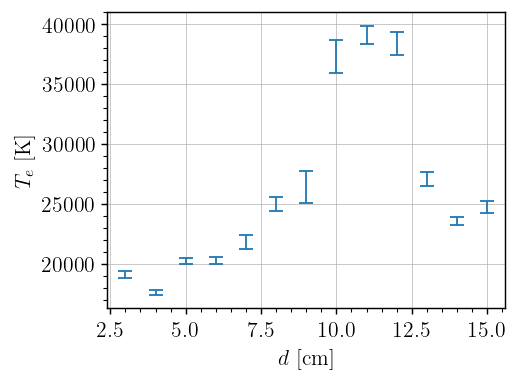

In [58]:
plt.errorbar(distances, nom_vals(T_e), yerr=std_devs(T_e), ls='')
plt.xlabel(r'$d$ [cm]')
plt.ylabel(r'$T_e$ [K]')

Text(0, 0.5, '$k_B T_e$ [eV]')

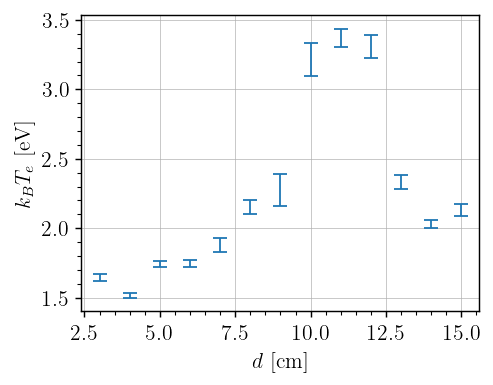

In [59]:
plt.errorbar(distances, nom_vals(T), yerr=std_devs(T), ls='')
plt.xlabel(r'$d$ [cm]')
plt.ylabel(r'$k_B T_e$ [eV]')

Text(0, 0.5, '$n_e$ [1/m³]')

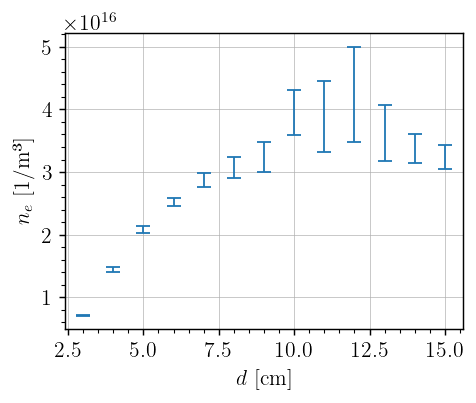

In [60]:
plt.errorbar(distances, nom_vals(n_e), yerr=std_devs(n_e), ls='')
plt.xlabel(r'$d$ [cm]')
plt.ylabel(r'$n_e$ [1/m³]')